###  Developing stocks  trading strategies based on technical analysis- Part 3
In continuation to developing stock trading strategies, I will develop Moving Average Convergence Divergence strategy using python and explore major stocks and etfs to see if profitable trading models can be developed using Bollinger Band Strategy.



###  Moving Average Convergence Divergence (MACD)
[MACD](https://www.investopedia.com/terms/m/macd.asp) is a momentum based  trend indicator and is based on the convergence and divergence of 12 and 26 period exponential moving average(EMA). MACD indicator, consists of following components:

 - #### Fast Line : This line represents short term exponential moving average, which is 12 period EMA
 
 - #### Slow Line : This line represents long term exponential moving average, which is 26 period EMA
 
 - #### MACD Line : This line represents the difference between fast and slow line. 
 
 - #### MACD Line : 12 period EMA- 26 period EMA
 
 - #### Signal Line: This line is the 9 period EMA of MACD 
 
 - #### MACD histogram : MACD Line -Signal Line
 
 - #### Zero Line : It's the base line with value of zero, and on this line MACD histogram is plotted. Generally, positive values of MACD bars are shown as Geen ans negative values are shown as Red
  
In general, when MACD line turns positive coming from below zero,it represents a bullish signal also called [golden cross](https://www.investopedia.com/terms/g/goldencross.asp#:~:text=The%20golden%20cross%20occurs%20when,upward%20turn%20in%20a%20market.) and when MACD lINE turn negative coming from above zero, it represents a bearish signal also called [death cross](https://www.investopedia.com/terms/g/goldencross.asp#:~:text=The%20golden%20cross%20occurs%20when,upward%20turn%20in%20a%20market.)




## Installing Libraries

In [1]:
%%capture
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install seaborn
!pip install numpy
%%capture
## https://github.com/Worlddatascience/DataScienceCohort/blob/master/6_How_to_Create_a_Candlestick_Chart_using_Python.ipynb
!pip install cufflinks
## Code to Install Backtrader
!pip install backtrader
#%%capture
! pip install pandas-ta
! pip install -U kaleido
%%capture
! pip install openpyxl

## Importing necessary packages

In [6]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import cufflinks as cf   
#A powerful data visualization library used for Financial Data Science processes
#from plotly.offline import iplot, init_notebook_mode
#Plotly and cufflinks work in conjunction
#cf.go_offline() 
#gives ability to plot offline
#init_notebook_mode() 
#gives ability to plot things proportionately in the notebook
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import kaleido
import plotly.io as pio


 ###  Function for RSI
> 1.Yahoo finance api is used to obtain the data for stocks and etfs( exchange traded funds)

> 2.Main variables for bollinger band strategy are:
>> - Stock Symbol(name)\
>> - frequency of stock price collection (frequency)
>> - Starting Date (first)
>> - Endinng Date (last)
>> - No of periods for collecting data for RSI calculation (period) 
>> - Total investment values (investment_value)   
>> - RSI for buying (buyRSI)
>> - RSI for selling(sellRSI)

**The below function will show the total profit by the strategy and the profit if invested only one time, along with the chart with buy and sell points. It will also show the candle stick plot with RSI and volume**

In [7]:
### https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
### https://www.alpharithms.com/calculate-macd-python-272222/
#import plotly
#name='QQQ'
#frequency='1d'
#first="2021-07-01"
#last="2022-11-26"
#period=14
#multiplier=1.7
#def stock(name,start,end):
def MACD_strategy(name="QQQ",frequency="1d",first="2019-11-4", last="2022-11-15",period=14,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=frequency,start=first,end=last)
    df['MiddleBand']= df['Close'].rolling(period).mean()
    df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
    df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier
    df['RSI']=ta.momentum.rsi(close=df['Close'],window=period)
    df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
#def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = -1
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df['Close'])):
        if df['MACD_12_26_9'][i]>df['MACDs_12_26_9'][i]:
            if signal != 1:
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df['MACD_12_26_9'][i]<df['MACDs_12_26_9'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    df['bb_signal']=bb_signal 
    
    position = []
    
    for i in range(len(df['bb_signal'])):
        if df['bb_signal'][i] > 1:
            position.append(1)
        else:
            position.append(0)
    
        
    for i in range(len(df['Close'])):
        if df['bb_signal'][i] == 1:
            position[i] = 1
        elif df['bb_signal'][i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
    df['position']=position
    df['return']=df['Close'].diff()
    bb_strategy_ret = []

    for i in range(len(df['return'])):
        try:
            returns = df['return'][i]*df['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    df['bb_returns']=bb_strategy_ret
    #profit_percentage = round((100*sum(df['buy_price'])-sum(df['sell_price']))/(sum(df['buy_price'])),2)
    #total_buy=np.mean((df1['buy_price']))
    #total_sell=np.mean((df1['sell_price']))
    buy=[item for item in df['buy_price']  if str(item) != 'nan']
    sell=[item for item in df['sell_price']  if str(item) != 'nan']
    if len(buy)==len(sell):
        #buy=list
        #buy=[item for item in df1['buy_price']  if str(item) != 'nan']
        total_buy=np.sum(buy)
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
        #print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    else:
        total_buy=np.sum(buy[:-1])
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    #return total_sell,total_buy
    #buy_sell_diff=total_sell-total_buy
    #profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    print('Profit percentage of the MACD  : {}%'.format(profit_percentage))
    Profit_oneinvest=round(((df['Close'][-1]-df['Close'][0])/(df['Close'][0])*100),2)
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))
    #df2=pd.concat([df, df1], axis=1)
    #df.info()
    #df.dropna()
    #df.info()
    # get ticker data
    #df = yf.Ticker('BTC-USD').history(period='1y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]

    # calculate MACD values
    #df.ta.macd(close='close', fast=12, slow=26, append=True)

    # Force lowercase (optional)
    #df.columns = [x.lower() for x in df.columns]

    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5)
    ax1.plot(df.index,df['buy_price'], marker = '^', color = 'green', label = 'BUY')
    ax1.plot(df.index,df['sell_price'], marker = 'v', color = 'red', label = 'SELL')
    ax1.set_title(name)
    ax2.plot(df['MACD_12_26_9'], color = 'orange', linewidth = 2.5,label='MACD Line')
    ax2.plot(df['MACDs_12_26_9'], color = 'black', linewidth = 1.0,label='Signal Line')
    for i in range(len(df['MACDh_12_26_9'])):
        if df['MACDh_12_26_9'][i] < 0:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#ef5350')
        else:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#26a69a')

    plt.legend(loc = 'lower right')
    #ax2.bar(df.index,df['MACDh_12_26_9'], color = 'blue',label='MACD-Signal')
    #ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    #ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.set_title('MACD')
    plt.show()
    plt.rc('font', size=14)
    


### Testing RSI strategy  for uptrending market 
### QQQ
 - QQQ, which is a exchange traded fund and follows nasdaq 100 index is explored for analysis

    As we are aware that NASDAQ overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the MACD  : 0.73%
Total profit by just investing one time inQQQ is584.23%


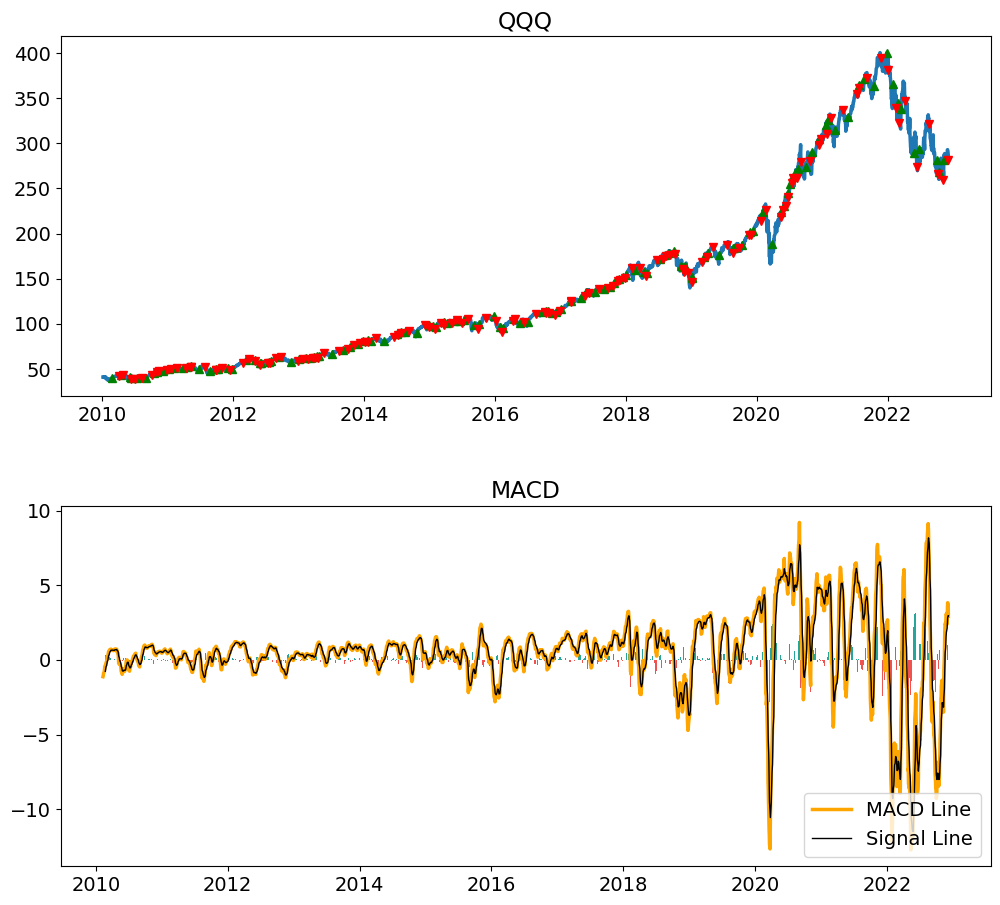

In [9]:
MACD_strategy("QQQ","1d","2010-01-4","2022-12-07",investment_value = 100000)

###  Testing RSI strategy  for down market
### QQQ
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF QQQ

Profit percentage of the MACD  : -1.22%
Total profit by just investing one time inQQQ is-23.35%


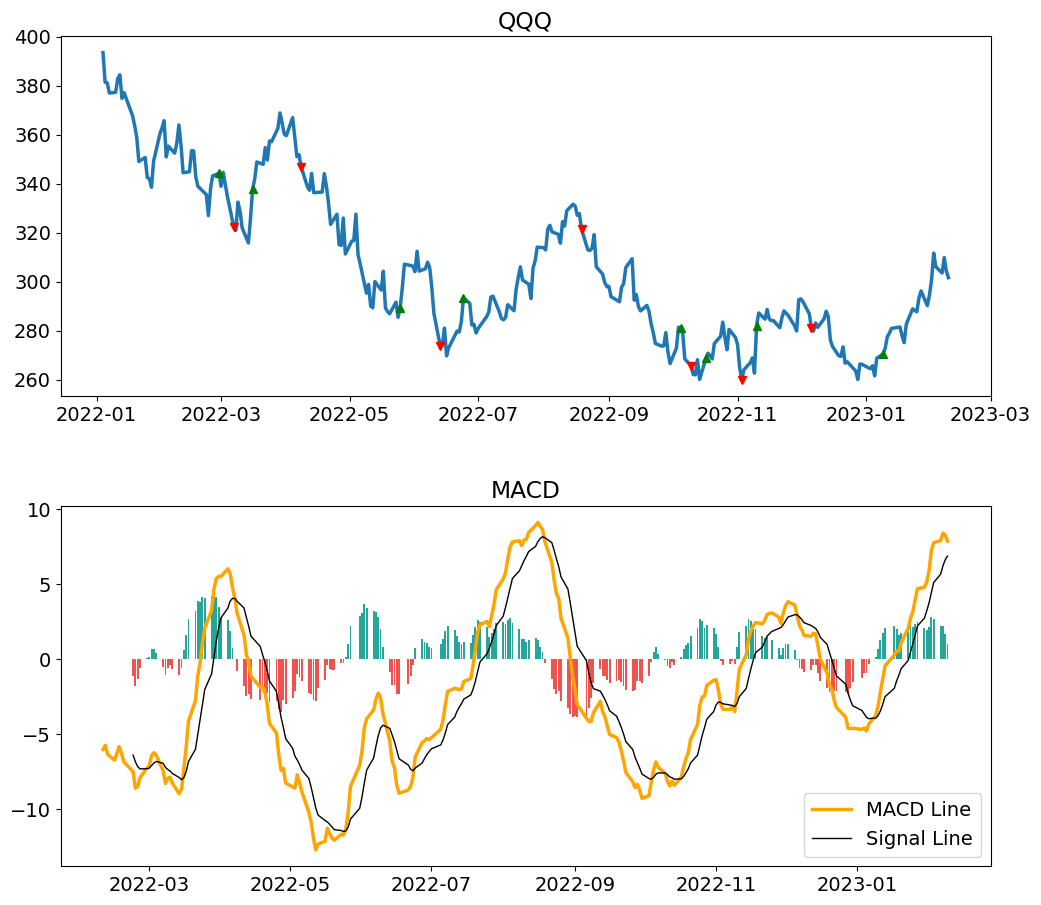

In [11]:

MACD_strategy("QQQ","1d","2022-01-4","2023-02-10",investment_value = 100000)

- #### It,s clear RSI strategy  gave better returns, when the market is trending down. 

### Testing RSI strategy for uptrending market 
### SPY
 - SPY, which is a exchange traded fund and follows S&P 500  index is explored for analysis

    As we are aware that S&P overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the MACD  : 0.6%
Total profit by just investing one time inSPY is343.2%


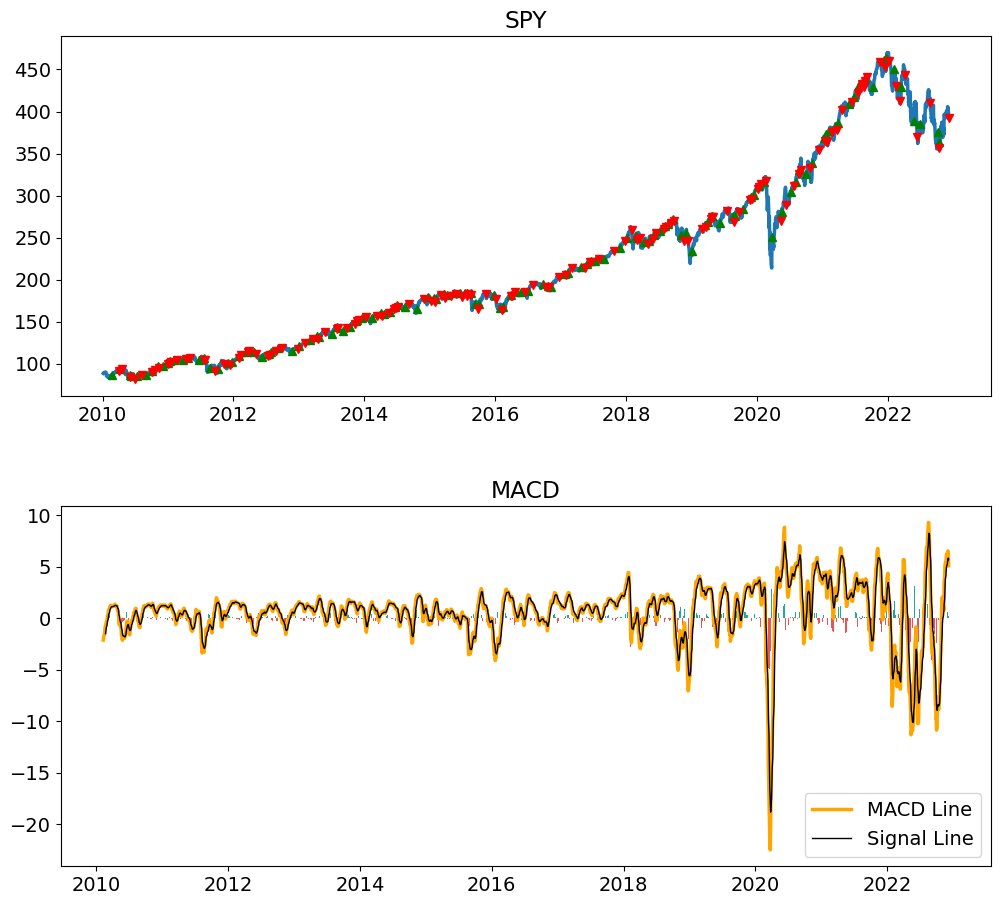

In [12]:

MACD_strategy("SPY","1d","2010-01-4","2022-12-07",investment_value = 100000)

###  Testing RSI strategy  for down market
### SPY
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF SPY

Profit percentage of the MACD  : -0.15%
Total profit by just investing one time inspy is-7.75%


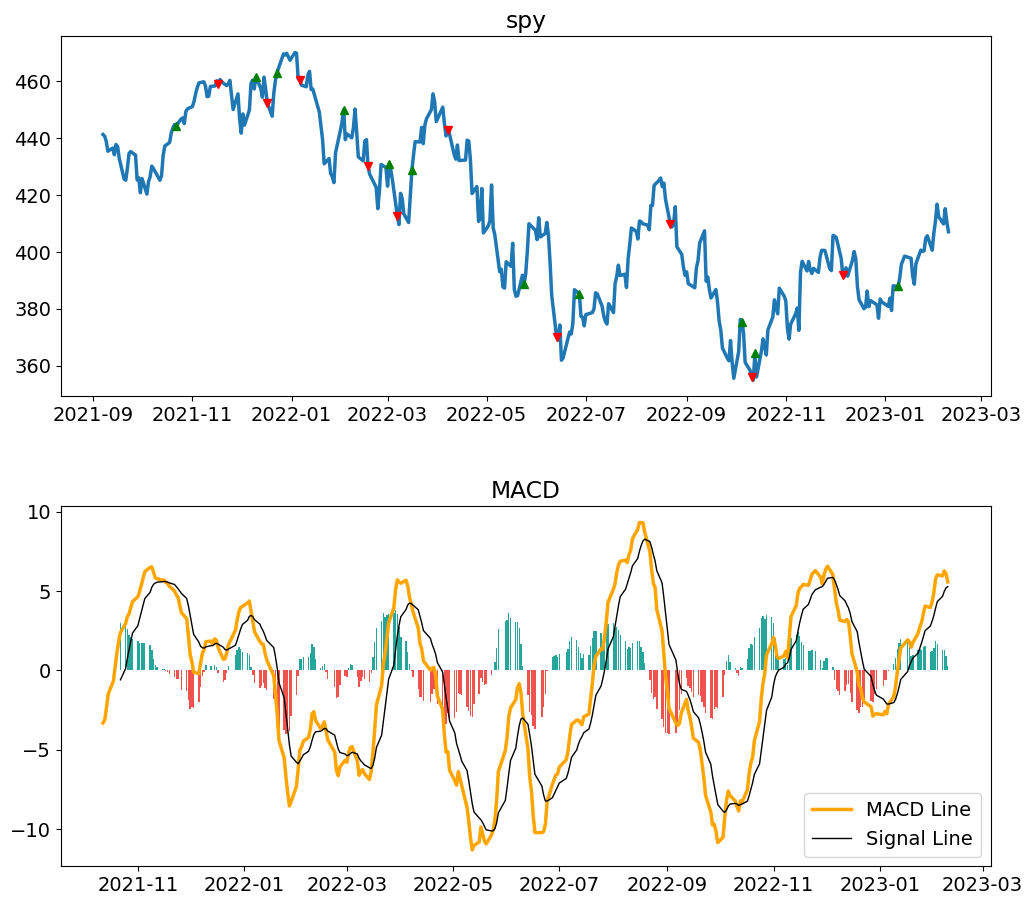

In [13]:

MACD_strategy("spy","1d","2021-09-4","2023-02-10",investment_value = 100000)

- #### It,s clear RSI strategy gave better returns even for SPY, when the market is trending down.

### Testing RSI strategy for uptrending market 
### DIA
 - DIA, which is a exchange traded fund and follows Dow Jonesindex is explored for analysis

    As we are aware that Dow Jones overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the MACD  : 0.81%
Total profit by just investing one time inDIA is325.03%


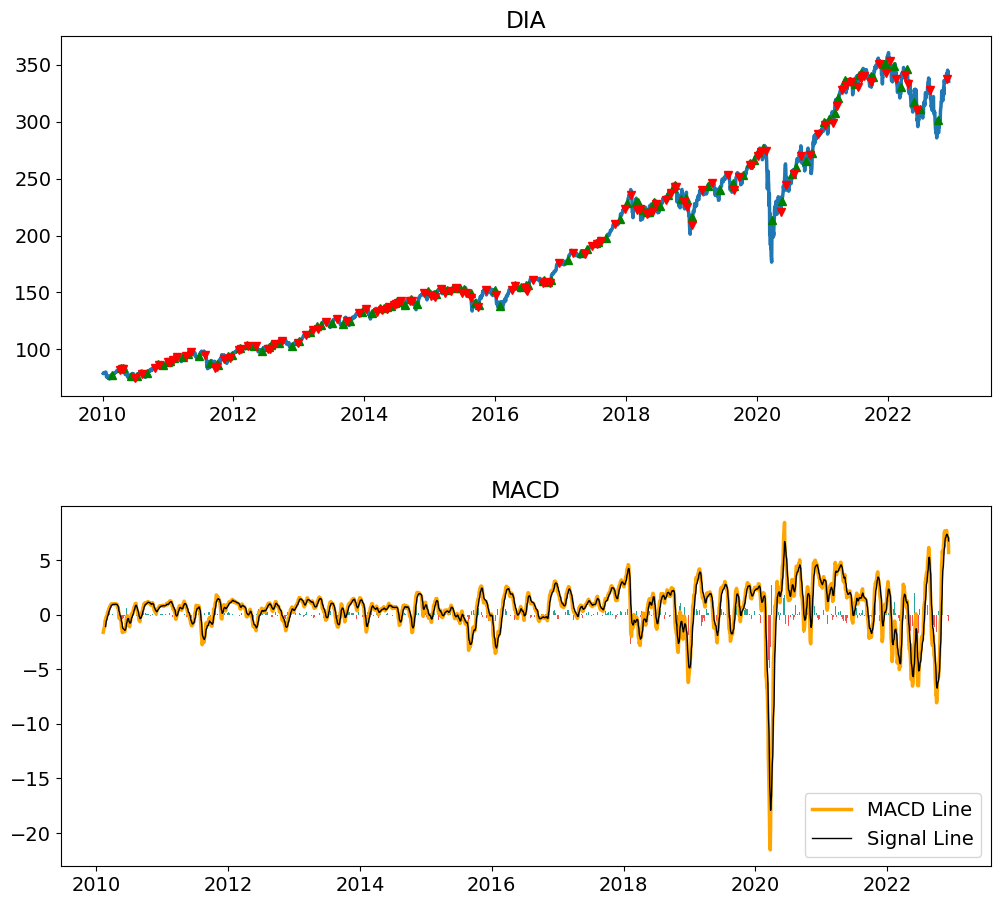

In [14]:
MACD_strategy("DIA","1d","2010-01-4","2022-12-07",investment_value = 100000)

###  Testing RSI strategy  for down market
### DIA
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF DIA

Profit percentage of the MACD  : 0.68%
Total profit by just investing one time inDIA is-1.51%


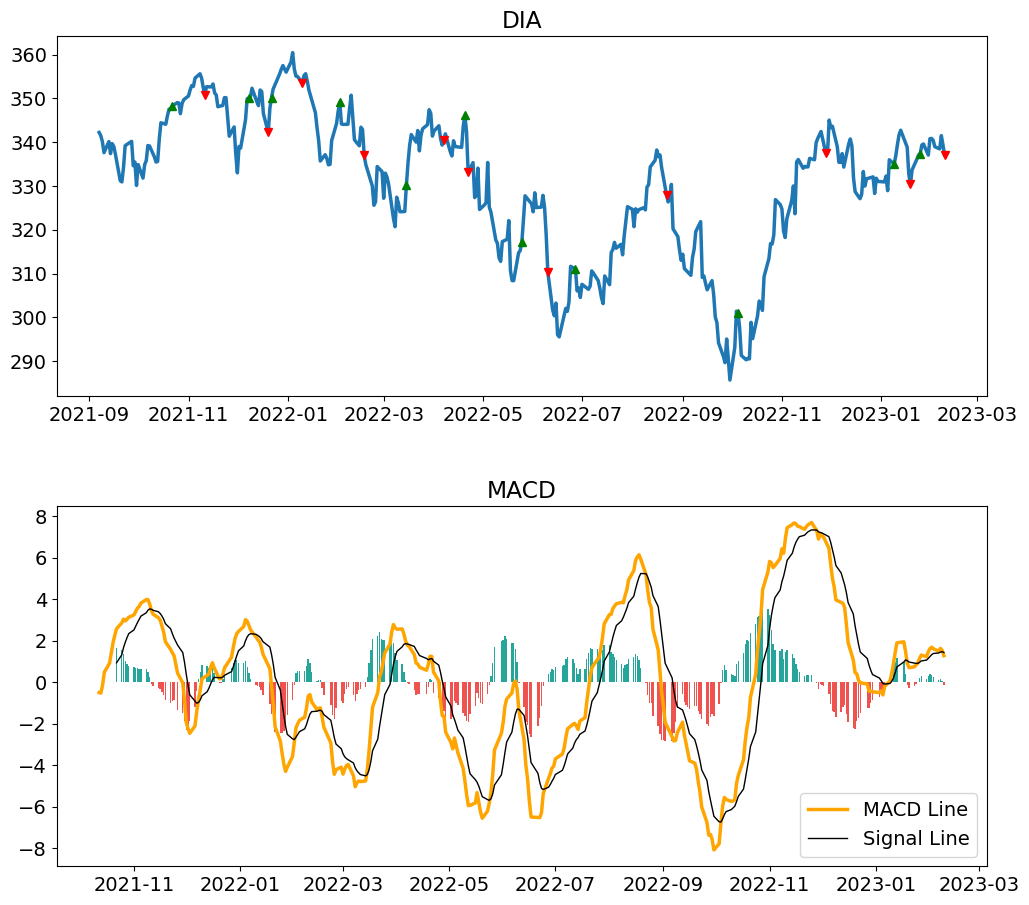

In [15]:
MACD_strategy("DIA","1d","2021-09-4","2023-02-10",investment_value = 100000)

- #### It,s clear RSI strategy gave better returns for DIA also, when the market is trending down mainly due to the fact that it is based on mean reversion

### Testing RSI strategy for non-trending market
### VYM
 - VYM, which is a high dividend yield xchange traded fund and has remained more or less steady over the period of last one year is evaluated to see if outperforms buy and hold strategy

    As we are aware that Dow Jones overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the MACD  : 0.01%
Total profit by just investing one time inVYM is-1.53%


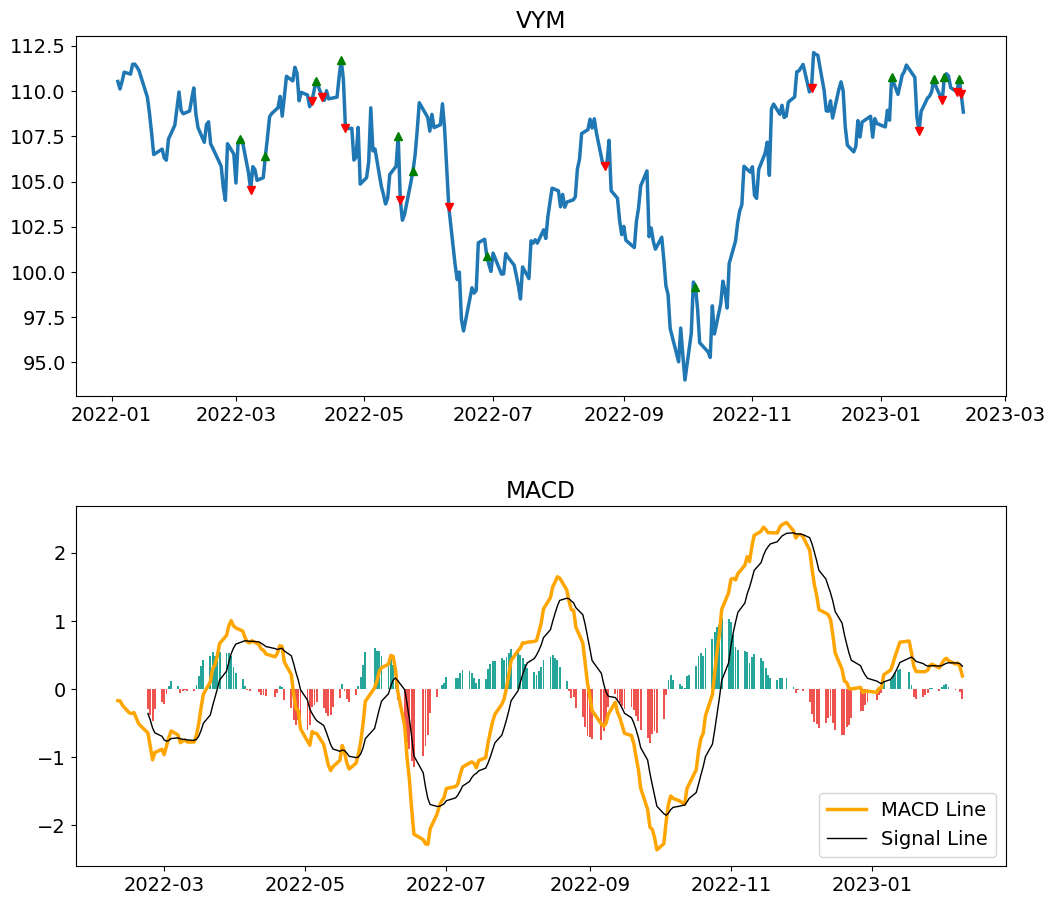

In [16]:
MACD_strategy("VYM","1d","2022-01-4","2023-02-10",investment_value = 100000)

###  RSI strategy :
#### Key findings
- RSI strategy performs poorly in an uptrending market
- It performs better compared to buy and hold strategy in non-trending and down-trending market
- Overall, In general RSI strategy performed better than Bollinger Band Strategy for 

### MACD Strategy

In [172]:
### https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
### https://www.alpharithms.com/calculate-macd-python-272222/
#import plotly
#name='QQQ'
#frequency='1d'
#first="2021-07-01"
#last="2022-11-26"
#period=14
#multiplier=1.7
#def stock(name,start,end):
def MACD_strategy(name="QQQ",frequency="1d",first="2019-11-4", last="2022-11-15",period=14,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=frequency,start=first,end=last)
    df['MiddleBand']= df['Close'].rolling(period).mean()
    df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
    df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier
    df['RSI']=ta.momentum.rsi(close=df['Close'],window=period)
    df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
#def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = -1
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df['Close'])):
        if df['MACD_12_26_9'][i]>df['MACDs_12_26_9'][i]:
            if signal != 1:
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df['MACD_12_26_9'][i]<df['MACDs_12_26_9'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    df['bb_signal']=bb_signal 
    
    position = []
    
    for i in range(len(df['bb_signal'])):
        if df['bb_signal'][i] > 1:
            position.append(1)
        else:
            position.append(0)
    
        
    for i in range(len(df['Close'])):
        if df['bb_signal'][i] == 1:
            position[i] = 1
        elif df['bb_signal'][i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
    df['position']=position
    df['return']=df['Close'].diff()
    bb_strategy_ret = []

    for i in range(len(df['return'])):
        try:
            returns = df['return'][i]*df['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    df['bb_returns']=bb_strategy_ret
    #profit_percentage = round((100*sum(df['buy_price'])-sum(df['sell_price']))/(sum(df['buy_price'])),2)
    #total_buy=np.mean((df1['buy_price']))
    #total_sell=np.mean((df1['sell_price']))
    buy=[item for item in df['buy_price']  if str(item) != 'nan']
    sell=[item for item in df['sell_price']  if str(item) != 'nan']
    if len(buy)==len(sell):
        #buy=list
        #buy=[item for item in df1['buy_price']  if str(item) != 'nan']
        total_buy=np.sum(buy)
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
        #print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    else:
        total_buy=np.sum(buy[:-1])
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    #return total_sell,total_buy
    #buy_sell_diff=total_sell-total_buy
    #profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    print('Profit percentage of the MACD  : {}%'.format(profit_percentage))
    Profit_oneinvest=round(((df['Close'][-1]-df['Close'][0])/(df['Close'][0])*100),2)
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))
    #df2=pd.concat([df, df1], axis=1)
    #df.info()
    #df.dropna()
    #df.info()
    # get ticker data
    #df = yf.Ticker('BTC-USD').history(period='1y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]

    # calculate MACD values
    #df.ta.macd(close='close', fast=12, slow=26, append=True)

    # Force lowercase (optional)
    #df.columns = [x.lower() for x in df.columns]

    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5)
    ax1.plot(df.index,df['buy_price'], marker = '^', color = 'green', label = 'BUY')
    ax1.plot(df.index,df['sell_price'], marker = 'v', color = 'red', label = 'SELL')
    ax1.set_title(name)
    ax2.plot(df['MACD_12_26_9'], color = 'orange', linewidth = 2.5,label='MACD Line')
    ax2.plot(df['MACDs_12_26_9'], color = 'black', linewidth = 1.0,label='Signal Line')
    for i in range(len(df['MACDh_12_26_9'])):
        if df['MACDh_12_26_9'][i] < 0:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#ef5350')
        else:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#26a69a')

    plt.legend(loc = 'lower right')
    #ax2.bar(df.index,df['MACDh_12_26_9'], color = 'blue',label='MACD-Signal')
    #ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    #ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.set_title('MACD')
    plt.show()
    plt.rc('font', size=14)
    Candlestick= cf.QuantFig(df, title=name, legend='top', name=name)
    Candlestick.add_volume() 
    Candlestick.add_macd() 
    Candlestick.iplot()

'''
# Construct a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)

# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',

    ), row=1, col=1
)

# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False

    ), row=1, col=1
)

# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',

    ), row=2, col=1
)

# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macds_12_26_9'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

# Colorize the histogram values
colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')

# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,

    ), row=2, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Update options and show plot
fig.update_layout(layout)
fig.show()
#df1.dropna()
'''
'''
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(googl['close'], googl_macd['macd'], googl_macd['signal'], googl_macd['hist'])
'''

"\ndef plot_macd(prices, macd, signal, hist):\n    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)\n    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)\n\n    ax1.plot(prices)\n    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')\n    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')\n\n    for i in range(len(prices)):\n        if str(hist[i])[0] == '-':\n            ax2.bar(prices.index[i], hist[i], color = '#ef5350')\n        else:\n            ax2.bar(prices.index[i], hist[i], color = '#26a69a')\n\n    plt.legend(loc = 'lower right')\n\nplot_macd(googl['close'], googl_macd['macd'], googl_macd['signal'], googl_macd['hist'])\n"

Profit percentage of the MACD  : 0.72%
Total profit by just investing one time inQQQ is495.36%


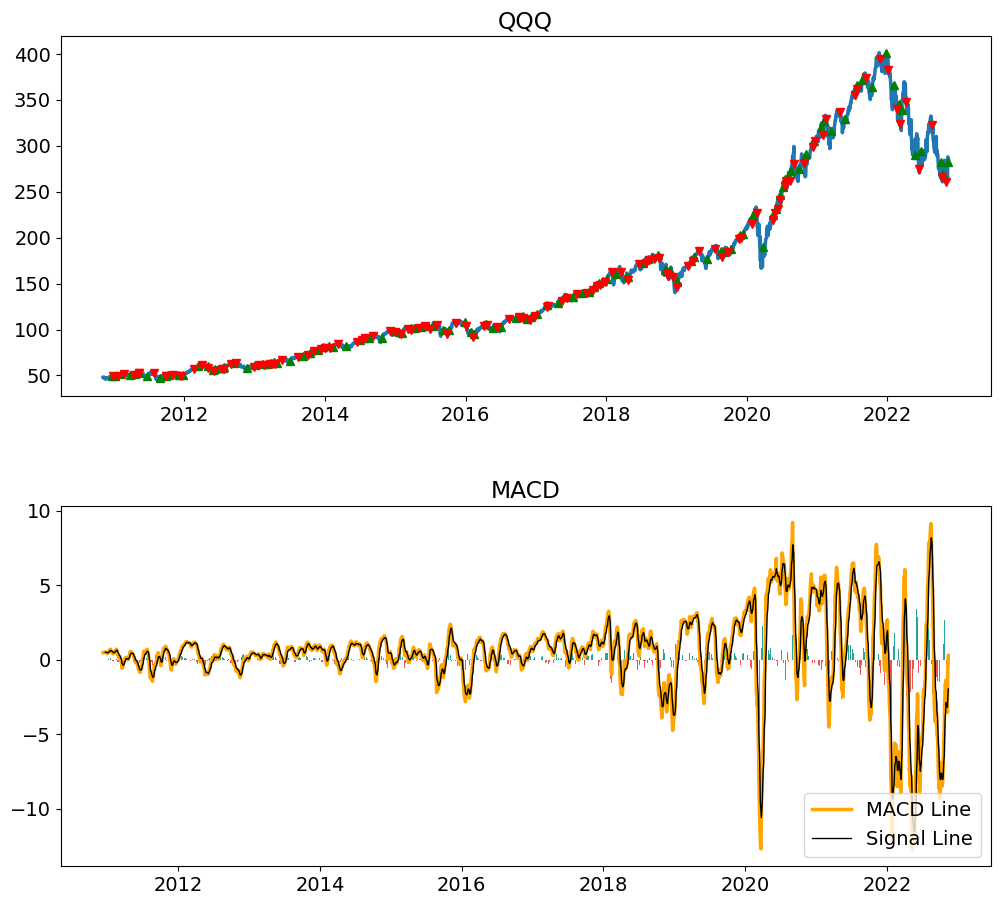

In [173]:
MACD_strategy(name="QQQ",frequency="1d",first="2010-11-4", last="2022-11-15",period=14,multiplier=1.7,investment_value = 100000)

In [43]:
### https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
### https://www.alpharithms.com/calculate-macd-python-272222/
#import plotly
#name='QQQ'
#frequency='1d'
#first="2021-07-01"
#last="2022-11-26"
#period=14
#multiplier=1.7
#def stock(name,start,end):
def MACD_RSI_strategy(name="QQQ",frequency="1d",first="2019-11-4", last="2022-11-15",period=14,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=frequency,start=first,end=last)
    df['MiddleBand']= df['Close'].rolling(period).mean()
    df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
    df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier
    df['RSI']=ta.momentum.rsi(close=df['Close'],window=period)
    df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
#def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = -1
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df['Close'])):
        if df['MACD_12_26_9'][i]>df['MACDs_12_26_9'][i] and df['RSI'][i] > 50 :
            if signal != 1:
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df['MACD_12_26_9'][i]<df['MACDs_12_26_9'][i] and df['RSI'][i] < 50:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    df['bb_signal']=bb_signal 
    
    position = []
    
    for i in range(len(df['bb_signal'])):
        if df['bb_signal'][i] > 1:
            position.append(1)
        else:
            position.append(0)
    
        
    for i in range(len(df['Close'])):
        if df['bb_signal'][i] == 1:
            position[i] = 1
        elif df['bb_signal'][i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
    df['position']=position
    df['return']=df['Close'].diff()
    bb_strategy_ret = []

    for i in range(len(df['return'])):
        try:
            returns = df['return'][i]*df['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    df['bb_returns']=bb_strategy_ret
    #profit_percentage = round((100*sum(df['buy_price'])-sum(df['sell_price']))/(sum(df['buy_price'])),2)
    #total_buy=np.mean((df1['buy_price']))
    #total_sell=np.mean((df1['sell_price']))
    buy=[item for item in df['buy_price']  if str(item) != 'nan']
    sell=[item for item in df['sell_price']  if str(item) != 'nan']
    if len(buy)==len(sell):
        #buy=list
        #buy=[item for item in df1['buy_price']  if str(item) != 'nan']
        total_buy=np.sum(buy)
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
        #print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    else:
        total_buy=np.sum(buy[:-1])
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    #return total_sell,total_buy
    #buy_sell_diff=total_sell-total_buy
    #profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    print('Profit percentage of the MACD  : {}%'.format(profit_percentage))
    Profit_oneinvest=round(((df['Close'][-1]-df['Close'][0])/(df['Close'][0])*100),2)
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))
    #df2=pd.concat([df, df1], axis=1)
    #df.info()
    #df.dropna()
    #df.info()
    # get ticker data
    #df = yf.Ticker('BTC-USD').history(period='1y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]

    # calculate MACD values
    #df.ta.macd(close='close', fast=12, slow=26, append=True)

    # Force lowercase (optional)
    #df.columns = [x.lower() for x in df.columns]

    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5)
    ax1.plot(df.index,df['buy_price'], marker = '^', color = 'green', label = 'BUY')
    ax1.plot(df.index,df['sell_price'], marker = 'v', color = 'red', label = 'SELL')
    ax1.set_title(name)
    ax2.plot(df['MACD_12_26_9'], color = 'orange', linewidth = 2.5,label='MACD Line')
    ax2.plot(df['MACDs_12_26_9'], color = 'black', linewidth = 1.0,label='Signal Line')
    for i in range(len(df['MACDh_12_26_9'])):
        if df['MACDh_12_26_9'][i] < 0:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#ef5350')
        else:
            ax2.bar(df.index[i], df['MACDh_12_26_9'][i], color = '#26a69a')

    plt.legend(loc = 'lower right')
    #ax2.bar(df.index,df['MACDh_12_26_9'], color = 'blue',label='MACD-Signal')
    #ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    #ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.set_title('MACD')
    plt.show()
    plt.rc('font', size=14)
    Candlestick= cf.QuantFig(df, title=name, legend='top', name=name)
    Candlestick.add_volume() 
    Candlestick.add_macd() 
    Candlestick.iplot()

'''
# Construct a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)

# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',

    ), row=1, col=1
)

# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False

    ), row=1, col=1
)

# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',

    ), row=2, col=1
)

# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macds_12_26_9'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

# Colorize the histogram values
colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')

# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,

    ), row=2, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Update options and show plot
fig.update_layout(layout)
fig.show()
#df1.dropna()
'''
'''
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(googl['close'], googl_macd['macd'], googl_macd['signal'], googl_macd['hist'])
'''

"\ndef plot_macd(prices, macd, signal, hist):\n    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)\n    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)\n\n    ax1.plot(prices)\n    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')\n    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')\n\n    for i in range(len(prices)):\n        if str(hist[i])[0] == '-':\n            ax2.bar(prices.index[i], hist[i], color = '#ef5350')\n        else:\n            ax2.bar(prices.index[i], hist[i], color = '#26a69a')\n\n    plt.legend(loc = 'lower right')\n\nplot_macd(googl['close'], googl_macd['macd'], googl_macd['signal'], googl_macd['hist'])\n"

Profit percentage of the MACD  : 1.54%
Total profit by just investing one time inQQQ is495.36%


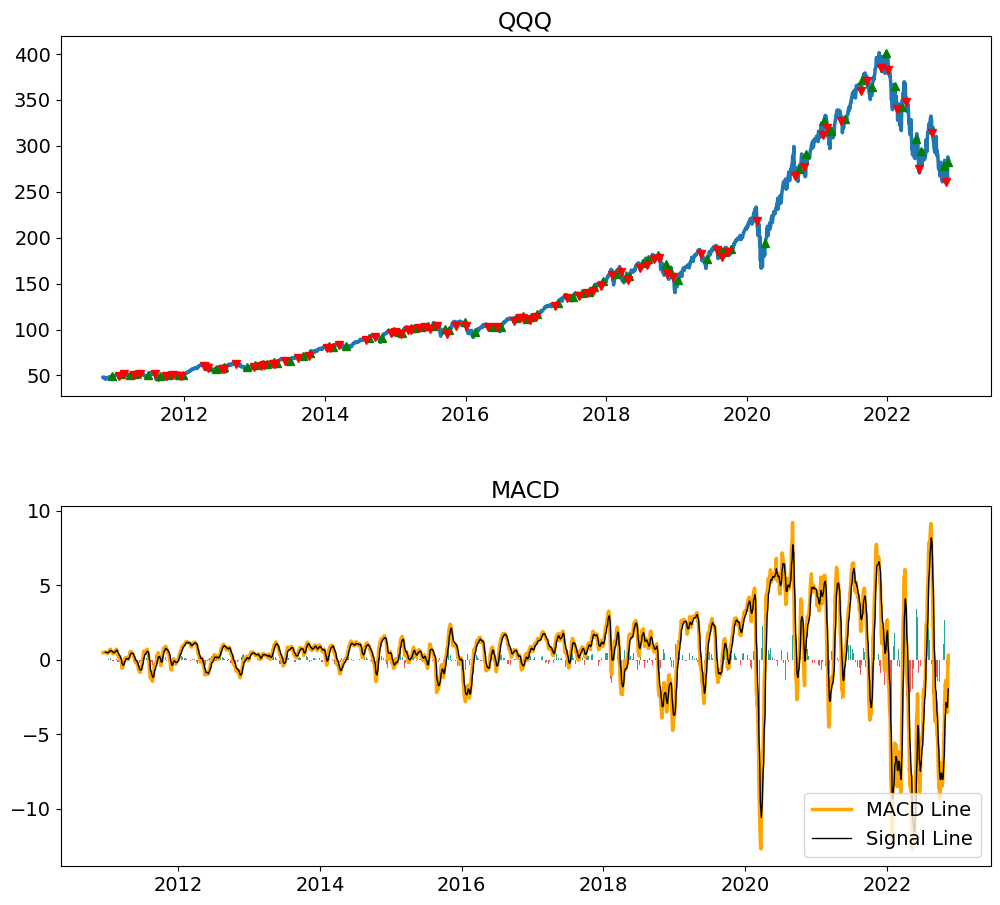

In [44]:
MACD_RSI_strategy(name="QQQ",frequency="1d",first="2010-11-4")

## Checking Data 

## Implementing buy and sell strategy using bollinger bands

In [ ]:
##https://medium.com/codex/algorithmic-trading-with-bollinger-bands-in-python-1b0a00c9ef99
#https://medium.com/codex/algorithmic-trading-with-bollinger-bands-in-python-1b0a00c9ef99
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
        position = []
    for i in range(len(bb_signal)):
        if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
    for i in range(len(df['Close'])):
        if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
    upper_bb = df['UpperBand']
    lower_bb = df['LowerBand']
    close_price = df['Close']
    bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

    frames = [close_price, upper_bb, lower_bb, bb_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    strategy = strategy.reset_index().drop('Date', axis = 1)

            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['LowerBand'], df['UpperBand'])


### Investment strategy

#### Creating a  position list to see if we already have the stock: 1 if we already own the stock 

In [ ]:
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = df['UpperBand']
lower_bb = df['LowerBand']
close_price = df['Close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index().drop('Date', axis = 1)

strategy

### Plotting Buyback signals on bollinger bands

In [ ]:
plt.rcParams['figure.figsize'] = [24,24]
plt.rc('font', size=14)
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.4)
df['UpperBand'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['MiddleBand'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['LowerBand'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 50)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 50)
plt.title('QQQ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper right')
plt.show()

__Back Testing to see how the trading strategy is working__

In [ ]:
import math
df_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(df_ret)):
    try:
        returns = df_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df['Close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print('Profit gained from the BB strategy by investing $100k in df : {}'.format(total_investment_ret))
print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))


### Using cufflinks for displaying bollingerband with candlestick

In [ ]:
%%capture
## https://github.com/Worlddatascience/DataScienceCohort/blob/master/6_How_to_Create_a_Candlestick_Chart_using_Python.ipynb
!pip install cufflinks
## Code to Install Backtrader
!pip install backtrader 
import cufflinks as cf   #A powerful data visualization library used for Financial Data Science processes
from plotly.offline import iplot, init_notebook_mode #Plotly and cufflinks work in conjunction

cf.go_offline() #gives ability to plot offline
init_notebook_mode() #gives ability to plot things proportionately in the notebook


In [ ]:
plt.rcParams['figure.figsize'] = [24,24]
plt.rc('font', size=14)
Candlestick= cf.QuantFig(df, title='QQQ', legend='top', name='QQQ')

In [ ]:
Candlestick.add_bollinger_bands(periods=20, boll_std=2, fill=True, column='Close')
Candlestick.add_volume() 
#Candlestick.add_dmi()#Adding parameters for a Volume chart (measure of shares and trading volume over a specified time)
#Candlestick.add_sma(periods=20, column='Close', color='red') #Simple Moving Average for a 20 day period 
#A 20-day moving average would average out the closing prices for the first 20 days as the first data point.
#Candlestick.add_ema(periods=20, color='green') #Exponential Moving Average for a 20 day period

In [ ]:
Candlestick.iplot()


In [ ]:
name = "QQQ"
#def stock(name,start,end):
def RSI_strategy(name="QQQ",window="1d",first="2019-11-4", last="2022-11-15",period=20,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=window,start=first,end=last)
    df['MiddleBand']= df['Close'].rolling(period).mean()
    df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
    df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier
    #return df
    #def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df['Close'])):
        if df['Close'][i-1] > df['LowerBand'][i-1] and df['Close'][i] < df['UpperBand'][i]:
            if signal != 1:
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df['Close'][i-1] < df['UpperBand'][i-1] and df['Close'][i] > df['UpperBand'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    df['bb_signal']=bb_signal 
        
    #return df
    position = []
    for i in range(len(df['bb_signal'])):
        if df['bb_signal'][i] > 1:
            position.append(0)
        else:
            position.append(1)
        
    for i in range(len(df['Close'])):
        if df['bb_signal'][i] == 1:
            position[i] = 1
        elif df['bb_signal'][i] == -1:
            df['bb_signal'][i] = 0
        else:
            position[i] = position[i-1]
    df['position']=position
    df_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    bb_strategy_ret = []

    for i in range(len(df_ret)):
        try:
            returns = df_ret['returns'][i]*df['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    
    bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

    #investment_value = 100000
    number_of_stocks = math.floor(investment_value/df['Close'][-1])
    bb_investment_ret = []

    for i in range(len(bb_strategy_ret_df['bb_returns'])):
        returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
        bb_investment_ret.append(returns)

    bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
    profit_percentage = round(((total_investment_ret/investment_value)*100),2)
    Profit_oneinvest=round(((df['Close'][-1]-df['Close'][0])/(df['Close'][0])*100),2)
    print('For total Investment in {}'.format(name),'of ${}'.format(investment_value))
    print('Profit gained from the BB strategy by investing in {}'.format(name),'is {}'.format(total_investment_ret))
    print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))

    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.4)
    df['UpperBand'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
    df['MiddleBand'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
    df['LowerBand'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
    plt.scatter(df.index,df['buy_price'], marker = '^', color = 'green', label = 'BUY', s = 50)
    plt.scatter(df.index,df['sell_price'], marker = 'v', color = 'red', label = 'SELL', s = 50)
    plt.title(name)
    plt.legend(loc = 'upper right')
    plt.show()
    plt.rcParams['figure.figsize'] = [16,16]
    plt.rc('font', size=14)
    Candlestick= cf.QuantFig(df, title=name, legend='top', name=name)
    Candlestick.add_volume() 
    Candlestick.add_rsi(periods=14, color='green') 
    Candlestick.iplot()
    #Candlestick.add_rsi(periods=14, color='green') 
    #Candlestick.add_macd()
    #Candlestick.add_dmi()
    #Candlestick.iplot()
    #Candlestick.add_sma(periods=20, column='Close', color='red')
    #Candlestick.add_ema(periods=20, color='grey')
    #Candlestick.iplot()
    